# BRIAN CANLEA
MACHINE LEARNING PROJECT
CS4662 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, cv2
import random
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D, Activation
# import the core layers:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import ReduceLROnPlateau

from keras.utils import np_utils

# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

from sklearn.utils import shuffle

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from PIL import Image


%matplotlib inline

In [26]:
mainDIR = os.listdir('/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', '.ipynb_checkpoints', 'val']


In [27]:
train_folder = '/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray/train'
val_folder = '/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray/val'
test_folder = '/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray/test'

In [28]:
# train  Let's set up the training and testing folders
print(os.listdir(train_folder))

train_normal = train_folder + '/NORMAL/'
train_pneumonia = train_folder + '/PNEUMONIA/'

['.DS_Store', 'PNEUMONIA', 'NORMAL']


In [58]:
PATH = os.getcwd()

#Define data path
data_path = PATH + '/chest_xray'
data_dir_list = os.listdir(data_path)
# img_rows=128
# img_cols=128
# num_channel = 1

labels_name={'NORMAL':0,'PNEUMONIA':1}

img_data_list = []

labels_list = []

print(data_dir_list)

for dataset in data_dir_list:
    if (dataset != '.DS_Store' and dataset != '.ipynb_checkpoints'):
        folder_list = os.listdir(data_path + '/' + dataset)
        #print(data_path + '/' + dataset)
        #print(folder_list)
        for folderlist in folder_list:
            if (folderlist != '.DS_Store'):
                img_list = os.listdir(data_path + '/' + dataset + '/' + folderlist)
                print(data_path + '/' + dataset + '/' + folderlist)
                print(img_list)
                print ('Loaded the images of ' + folderlist + ' from folder of ' + dataset + '\n')
                labels = labels_name[folderlist]
                print("Label:", labels)
                for img in img_list:
                    #print("Img_list", img)
                    if (img != '.DS_Store'):
                        input_img = cv2.imread(data_path + '/'+ dataset + '/'+ folderlist + '/' +img)
                        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
                        input_img_resize = cv2.resize(input_img, (64, 64))
                        img_data_list.append(input_img_resize)
                        labels_list.append(labels)

['.DS_Store', 'test', 'train', '.ipynb_checkpoints', 'val']
/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray/test/PNEUMONIA
['person147_bacteria_706.jpeg', 'person100_bacteria_482.jpeg', 'person78_bacteria_382.jpeg', 'person124_bacteria_589.jpeg', 'person1647_virus_2848.jpeg', 'person1675_virus_2891.jpeg', 'person89_bacteria_440.jpeg', 'person35_virus_80.jpeg', 'person122_bacteria_582.jpeg', 'person119_bacteria_565.jpeg', 'person1662_virus_2875.jpeg', 'person85_bacteria_422.jpeg', 'person1669_virus_2884.jpeg', 'person39_virus_85.jpeg', 'person36_virus_81.jpeg', 'person134_bacteria_640.jpeg', 'person138_bacteria_659.jpeg', 'person92_bacteria_450.jpeg', 'person34_virus_76.jpeg', 'person22_virus_55.jpeg', 'person120_bacteria_571.jpeg', 'person110_bacteria_531.jpeg', 'person23_virus_56.jpeg', 'person94_bacteria_457.jpeg', 'person126_bacteria_599.jpeg', 'person1_virus_13.jpeg', 'person151_bacteria_718.jpeg', 'person37_virus_82.jpeg', 'person109_bacteria_527.jpeg', 'p

/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray/test/NORMAL
['IM-0031-0001.jpeg', 'IM-0025-0001.jpeg', 'NORMAL2-IM-0272-0001.jpeg', 'NORMAL2-IM-0102-0001.jpeg', 'NORMAL2-IM-0229-0001.jpeg', 'NORMAL2-IM-0315-0001.jpeg', 'NORMAL2-IM-0123-0001.jpeg', 'NORMAL2-IM-0301-0001.jpeg', 'NORMAL2-IM-0246-0001-0002.jpeg', 'IM-0010-0001.jpeg', 'IM-0046-0001.jpeg', 'NORMAL2-IM-0357-0001.jpeg', 'NORMAL2-IM-0027-0001.jpeg', 'NORMAL2-IM-0033-0001.jpeg', 'NORMAL2-IM-0343-0001.jpeg', 'IM-0028-0001.jpeg', 'NORMAL2-IM-0339-0001.jpeg', 'NORMAL2-IM-0173-0001-0002.jpeg', 'NORMAL2-IM-0012-0001.jpeg', 'NORMAL2-IM-0362-0001.jpeg', 'IM-0009-0001.jpeg', 'NORMAL2-IM-0297-0001.jpeg', 'IM-0073-0001.jpeg', 'IM-0067-0001.jpeg', 'NORMAL2-IM-0283-0001.jpeg', 'NORMAL2-IM-0376-0001.jpeg', 'NORMAL2-IM-0313-0001.jpeg', 'NORMAL2-IM-0019-0001.jpeg', 'NORMAL2-IM-0369-0001.jpeg', 'NORMAL2-IM-0196-0001.jpeg', 'IM-0016-0001.jpeg', 'NORMAL2-IM-0288-0001.jpeg', 'NORMAL2-IM-0241-0001.jpeg', 'IM-0011-0001-0001.

/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray/train/NORMAL
['NORMAL2-IM-0927-0001.jpeg', 'NORMAL2-IM-1056-0001.jpeg', 'IM-0427-0001.jpeg', 'NORMAL2-IM-1260-0001.jpeg', 'IM-0656-0001-0001.jpeg', 'IM-0561-0001.jpeg', 'NORMAL2-IM-1110-0001.jpeg', 'IM-0757-0001.jpeg', 'NORMAL2-IM-1326-0001.jpeg', 'NORMAL2-IM-0736-0001.jpeg', 'NORMAL2-IM-0500-0001.jpeg', 'NORMAL2-IM-0393-0001.jpeg', 'NORMAL2-IM-0994-0001.jpeg', 'IM-0207-0001.jpeg', 'IM-0494-0001.jpeg', 'IM-0177-0001.jpeg', 'IM-0388-0001.jpeg', 'IM-0341-0001.jpeg', 'IM-0355-0001.jpeg', 'IM-0449-0001.jpeg', 'IM-0480-0001.jpeg', 'NORMAL2-IM-1038-0001.jpeg', 'NORMAL2-IM-1348-0001.jpeg', 'IM-0739-0001.jpeg', 'IM-0213-0001.jpeg', 'NORMAL2-IM-0452-0001.jpeg', 'NORMAL2-IM-0980-0001.jpeg', 'NORMAL2-IM-0949-0001.jpeg', 'NORMAL2-IM-0664-0001.jpeg', 'NORMAL2-IM-1332-0001.jpeg', 'IM-0269-0001.jpeg', 'NORMAL2-IM-1104-0001.jpeg', 'IM-0575-0001.jpeg', 'IM-0605-0001.jpeg', 'NORMAL2-IM-1274-0001.jpeg', 'IM-0433-0001.jpeg', 'IM-0119

/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray/val/PNEUMONIA
['.DS_Store', 'person1950_bacteria_4881.jpeg', 'person1951_bacteria_4882.jpeg', 'person1952_bacteria_4883.jpeg', 'person1946_bacteria_4874.jpeg', 'person1947_bacteria_4876.jpeg', 'person1946_bacteria_4875.jpeg', 'person1949_bacteria_4880.jpeg', 'person1954_bacteria_4886.jpeg']
Loaded the images of PNEUMONIA from folder of val

Label: 1
/Users/briancanela/Documents/Advance Machine Learning/Project/chest_xray/val/NORMAL
['NORMAL2-IM-1440-0001.jpeg', 'NORMAL2-IM-1437-0001.jpeg', '.DS_Store', 'NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1436-0001.jpeg', 'NORMAL2-IM-1430-0001.jpeg', 'NORMAL2-IM-1438-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1427-0001.jpeg']
Loaded the images of NORMAL from folder of val

Label: 0


In [59]:
#convert to array
img_data = np.array(img_data_list)

#convert to float, 0 - 1
img_data = img_data.astype('float32')

#scale
img_data /= 255
print (img_data.shape)

(5856, 64, 64)


In [60]:
labels = np.array(labels_list)

print(np.unique(labels,return_counts=True))

(array([0, 1]), array([1583, 4273]))


In [61]:
Y = labels

In [62]:
X,y = shuffle(img_data,Y, random_state=2)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
# Reshape the the pixels into a line:
X_train = X_train.reshape(X_train.shape[0], 4096)
X_test = X_test.reshape(X_test.shape[0], 4096)

In [36]:
print(X)
print(X_train.shape) #(4684, 4096), we got 4096 b/c 64 x 64. 
print(y.shape)

[[[0.08235294 0.07450981 0.04705882 ... 0.1882353  0.7176471  0.57254905]
  [0.07058824 0.04705882 0.19215687 ... 0.15686275 0.2627451  0.7607843 ]
  [0.05490196 0.16862746 0.1764706  ... 0.18431373 0.24313726 0.39215687]
  ...
  [0.10588235 0.09803922 0.09803922 ... 0.08235294 0.08235294 0.08235294]
  [0.10196079 0.09411765 0.08627451 ... 0.08235294 0.08627451 0.08627451]
  [0.10196079 0.09019608 0.09803922 ... 0.08235294 0.08627451 0.08627451]]

 [[0.         0.00392157 0.07843138 ... 0.6        0.28235295 0.23529412]
  [0.         0.         0.04705882 ... 0.5294118  0.29411766 0.22745098]
  [0.         0.         0.03921569 ... 0.32941177 0.28235295 0.21568628]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.00784314 ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.32156864 0.2901961  0.22745098]
  [0.         0.      

In [37]:
print (y_train.shape)
print (y_train[:10])

(4684,)
[1 1 0 1 0 1 0 0 1 1]


In [38]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [39]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10,:])

(4684, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [40]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

#print(X_test)
print('\n')
print(y_test)

(4684, 4096)
(4684, 2)
(1172, 4096)
(1172, 2)


[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# NEURAL NETOWORK MODEL(IN CLASS EX), WITH BEST PARAMS using GRIDSEARCHCV

In [17]:
input_size = 4096
hidden_neurons = 100
out_size = 2

def model_creator():
    # define:
    model = Sequential()
    
    # -----------------------------------------
    # second layer: hidden layer:
    model.add(Dense(hidden_neurons, input_dim = input_size))  # Nuerons
    model.add(Activation('sigmoid')) # Activation

    # -----------------------------------------
    # third layer: output layer:
    model.add(Dense(out_size, input_dim = hidden_neurons))  # Nuerons
    model.add(Activation('softmax')) # Activation

    
    # compile:
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
  
    return model

model_creator()

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
seed = 2
np.random.seed(seed)

In [19]:
model = KerasClassifier(build_fn = model_creator, verbose=2)

print(model)

In [20]:
#DEFINED THE VALUES THAT SHOULD BE SEARCHED
batchsize = [30 , 50 , 100 ] 
epochs = [10 , 15 , 20]

#CREATING A PARAM_GRID: MAPPING THE param names to the values that should be searched
param_grid = {'batch_size':batchsize, 'epochs':epochs} 
grid = GridSearchCV(model, param_grid, cv=10, scoring='neg_log_loss')


In [21]:
fitted_model = grid.fit(X_train, y_train, validation_split=0.33,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 2824 samples, validate on 1391 samples
Epoch 1/10
2824/2824 [==============================] - 1s 429us/step - loss: 0.6079 - acc: 0.7174 - val_loss: 0.4675 - val_acc: 0.7527
Epoch 2/10
2824/2824 [==============================] - 1s 301us/step - loss: 0.3925 - acc: 0.8463 - val_loss: 0.4063 - val_acc: 0.8081
Epoch 3/10
2824/2824 [==============================] - 1s 296us/step - loss: 0.2891 - acc: 0.8948 - val_loss: 0.2846 - val_acc: 0.8843
Epoch 4/10
2824/2824 [==============================] - 1s 303us/step - loss: 0.2287 - acc: 0.9189 - val_loss: 0.1996 - val_acc: 0.9224
Epoch 5/10
2824/2824 [==============================] - 1s 328us/step - loss: 0.2043 - acc: 0.9235 - val_loss: 0.2440 - val_acc: 0.8986
Epoch 6/10
2824/2824 [==============================] - 1s 321us/step - loss: 0.2050 - acc: 0.9228 - val_loss: 0.2241 - val_acc: 0.9073
Epoch 7/10
2824/2824 [==============================] - 1s 343us/step - loss: 0.1749 - a

2824/2824 [==============================] - 1s 254us/step - loss: 0.1529 - acc: 0.9426 - val_loss: 0.1642 - val_acc: 0.9382
Train on 2824 samples, validate on 1391 samples
Epoch 1/15
2824/2824 [==============================] - 1s 475us/step - loss: 0.5762 - acc: 0.7135 - val_loss: 0.4443 - val_acc: 0.7290
Epoch 2/15
2824/2824 [==============================] - 1s 245us/step - loss: 0.3192 - acc: 0.8789 - val_loss: 0.2538 - val_acc: 0.9008
Epoch 3/15
2824/2824 [==============================] - 1s 246us/step - loss: 0.2399 - acc: 0.9097 - val_loss: 0.2556 - val_acc: 0.8994
Epoch 4/15
2824/2824 [==============================] - 1s 246us/step - loss: 0.2061 - acc: 0.9246 - val_loss: 0.1989 - val_acc: 0.9195
Epoch 5/15
2824/2824 [==============================] - 1s 236us/step - loss: 0.2045 - acc: 0.9235 - val_loss: 0.2094 - val_acc: 0.9195
Epoch 6/15
2824/2824 [==============================] - 1s 241us/step - loss: 0.1994 - acc: 0.9210 - val_loss: 0.1790 - val_acc: 0.9231
Epoch 7/15


Epoch 14/15
2824/2824 [==============================] - 1s 243us/step - loss: 0.1464 - acc: 0.9472 - val_loss: 0.1685 - val_acc: 0.9310
Epoch 15/15
2824/2824 [==============================] - 1s 240us/step - loss: 0.1510 - acc: 0.9426 - val_loss: 0.1629 - val_acc: 0.9346
Train on 2824 samples, validate on 1392 samples
Epoch 1/15
2824/2824 [==============================] - 2s 547us/step - loss: 0.6164 - acc: 0.7270 - val_loss: 0.3933 - val_acc: 0.8793
Epoch 2/15
2824/2824 [==============================] - 1s 261us/step - loss: 0.3051 - acc: 0.8899 - val_loss: 0.2784 - val_acc: 0.8772
Epoch 3/15
2824/2824 [==============================] - 1s 263us/step - loss: 0.2300 - acc: 0.9168 - val_loss: 0.2400 - val_acc: 0.9059
Epoch 4/15
2824/2824 [==============================] - 1s 263us/step - loss: 0.2193 - acc: 0.9044 - val_loss: 0.1808 - val_acc: 0.9246
Epoch 5/15
2824/2824 [==============================] - 1s 252us/step - loss: 0.1906 - acc: 0.9295 - val_loss: 0.3270 - val_acc: 0.854

2824/2824 [==============================] - 2s 626us/step - loss: 0.5247 - acc: 0.7989 - val_loss: 0.3182 - val_acc: 0.8613
Epoch 2/20
2824/2824 [==============================] - 1s 259us/step - loss: 0.2671 - acc: 0.8970 - val_loss: 0.2816 - val_acc: 0.8914
Epoch 3/20
2824/2824 [==============================] - 1s 253us/step - loss: 0.2240 - acc: 0.9147 - val_loss: 0.1899 - val_acc: 0.9238
Epoch 4/20
2824/2824 [==============================] - 1s 254us/step - loss: 0.1980 - acc: 0.9210 - val_loss: 0.2739 - val_acc: 0.8871
Epoch 5/20
2824/2824 [==============================] - 1s 258us/step - loss: 0.2091 - acc: 0.9154 - val_loss: 0.2002 - val_acc: 0.9224
Epoch 6/20
2824/2824 [==============================] - 1s 253us/step - loss: 0.1812 - acc: 0.9331 - val_loss: 0.2135 - val_acc: 0.9180
Epoch 7/20
2824/2824 [==============================] - 1s 261us/step - loss: 0.1698 - acc: 0.9331 - val_loss: 0.1666 - val_acc: 0.9310
Epoch 8/20
2824/2824 [==============================] - 1s 

2824/2824 [==============================] - 1s 397us/step - loss: 0.1548 - acc: 0.9423 - val_loss: 0.1944 - val_acc: 0.9210
Epoch 20/20
2824/2824 [==============================] - 1s 406us/step - loss: 0.1422 - acc: 0.9494 - val_loss: 0.1817 - val_acc: 0.9346
Train on 2824 samples, validate on 1392 samples
Epoch 1/20
2824/2824 [==============================] - 2s 760us/step - loss: 0.4834 - acc: 0.7758 - val_loss: 0.3531 - val_acc: 0.8226
Epoch 2/20
2824/2824 [==============================] - 1s 237us/step - loss: 0.2955 - acc: 0.8803 - val_loss: 0.2408 - val_acc: 0.8944
Epoch 3/20
2824/2824 [==============================] - 1s 235us/step - loss: 0.2480 - acc: 0.9019 - val_loss: 0.2751 - val_acc: 0.8779
Epoch 4/20
2824/2824 [==============================] - 1s 236us/step - loss: 0.2636 - acc: 0.9001 - val_loss: 0.1930 - val_acc: 0.9260
Epoch 5/20
2824/2824 [==============================] - 1s 234us/step - loss: 0.1936 - acc: 0.9242 - val_loss: 0.1868 - val_acc: 0.9282
Epoch 6/20

Epoch 8/10
2824/2824 [==============================] - 0s 158us/step - loss: 0.1707 - acc: 0.9359 - val_loss: 0.1761 - val_acc: 0.9339
Epoch 9/10
2824/2824 [==============================] - 0s 156us/step - loss: 0.1668 - acc: 0.9380 - val_loss: 0.1695 - val_acc: 0.9288
Epoch 10/10
2824/2824 [==============================] - 0s 158us/step - loss: 0.1677 - acc: 0.9398 - val_loss: 0.1654 - val_acc: 0.9324
Train on 2824 samples, validate on 1391 samples
Epoch 1/10
2824/2824 [==============================] - 2s 690us/step - loss: 0.4710 - acc: 0.7953 - val_loss: 0.3097 - val_acc: 0.8799
Epoch 2/10
2824/2824 [==============================] - 0s 168us/step - loss: 0.2645 - acc: 0.8959 - val_loss: 0.2622 - val_acc: 0.8950
Epoch 3/10
2824/2824 [==============================] - 0s 171us/step - loss: 0.2086 - acc: 0.9217 - val_loss: 0.1882 - val_acc: 0.9188
Epoch 4/10
2824/2824 [==============================] - 1s 253us/step - loss: 0.2148 - acc: 0.9125 - val_loss: 0.1774 - val_acc: 0.9224

2824/2824 [==============================] - 0s 175us/step - loss: 0.2035 - acc: 0.9260 - val_loss: 0.2302 - val_acc: 0.9124
Epoch 7/10
2824/2824 [==============================] - 0s 170us/step - loss: 0.1903 - acc: 0.9306 - val_loss: 0.1878 - val_acc: 0.9325
Epoch 8/10
2824/2824 [==============================] - 0s 167us/step - loss: 0.1767 - acc: 0.9373 - val_loss: 0.1992 - val_acc: 0.9303
Epoch 9/10
2824/2824 [==============================] - 0s 172us/step - loss: 0.1877 - acc: 0.9274 - val_loss: 0.1787 - val_acc: 0.9332
Epoch 10/10
2824/2824 [==============================] - 0s 171us/step - loss: 0.1852 - acc: 0.9317 - val_loss: 0.1752 - val_acc: 0.9332
Train on 2824 samples, validate on 1392 samples
Epoch 1/10
2824/2824 [==============================] - 2s 784us/step - loss: 0.6327 - acc: 0.7326 - val_loss: 0.4456 - val_acc: 0.7428
Epoch 2/10
2824/2824 [==============================] - 0s 172us/step - loss: 0.3698 - acc: 0.8573 - val_loss: 0.3359 - val_acc: 0.8649
Epoch 3/10

Epoch 3/15
2824/2824 [==============================] - 1s 181us/step - loss: 0.2514 - acc: 0.9104 - val_loss: 0.3483 - val_acc: 0.8441
Epoch 4/15
2824/2824 [==============================] - 1s 181us/step - loss: 0.2253 - acc: 0.9143 - val_loss: 0.2055 - val_acc: 0.9167
Epoch 5/15
2824/2824 [==============================] - 1s 181us/step - loss: 0.2229 - acc: 0.9108 - val_loss: 0.2241 - val_acc: 0.9073
Epoch 6/15
2824/2824 [==============================] - 1s 182us/step - loss: 0.2030 - acc: 0.9235 - val_loss: 0.2021 - val_acc: 0.9174
Epoch 7/15
2824/2824 [==============================] - 1s 180us/step - loss: 0.1908 - acc: 0.9239 - val_loss: 0.2336 - val_acc: 0.9037
Epoch 8/15
2824/2824 [==============================] - 1s 186us/step - loss: 0.1936 - acc: 0.9239 - val_loss: 0.1761 - val_acc: 0.9303
Epoch 9/15
2824/2824 [==============================] - 1s 211us/step - loss: 0.1717 - acc: 0.9327 - val_loss: 0.1868 - val_acc: 0.9310
Epoch 10/15
2824/2824 [=========================

2824/2824 [==============================] - 0s 172us/step - loss: 0.1474 - acc: 0.9497 - val_loss: 0.1952 - val_acc: 0.9202
Train on 2824 samples, validate on 1391 samples
Epoch 1/20
2824/2824 [==============================] - 3s 1ms/step - loss: 0.6153 - acc: 0.7408 - val_loss: 0.4390 - val_acc: 0.8720
Epoch 2/20
2824/2824 [==============================] - 1s 193us/step - loss: 0.3415 - acc: 0.8722 - val_loss: 0.2748 - val_acc: 0.8914
Epoch 3/20
2824/2824 [==============================] - 1s 191us/step - loss: 0.2653 - acc: 0.8987 - val_loss: 0.2211 - val_acc: 0.9166
Epoch 4/20
2824/2824 [==============================] - 1s 185us/step - loss: 0.2128 - acc: 0.9242 - val_loss: 0.1994 - val_acc: 0.9195
Epoch 5/20
2824/2824 [==============================] - 1s 203us/step - loss: 0.2082 - acc: 0.9207 - val_loss: 0.2995 - val_acc: 0.8699
Epoch 6/20
2824/2824 [==============================] - 1s 199us/step - loss: 0.2210 - acc: 0.9072 - val_loss: 0.2600 - val_acc: 0.8914
Epoch 7/20
28

2824/2824 [==============================] - 1s 215us/step - loss: 0.1290 - acc: 0.9547 - val_loss: 0.1635 - val_acc: 0.9375
Epoch 20/20
2824/2824 [==============================] - 1s 189us/step - loss: 0.1264 - acc: 0.9511 - val_loss: 0.1745 - val_acc: 0.9318
Train on 2824 samples, validate on 1392 samples
Epoch 1/20
2824/2824 [==============================] - 3s 1ms/step - loss: 0.7303 - acc: 0.7164 - val_loss: 0.5854 - val_acc: 0.7213
Epoch 2/20
2824/2824 [==============================] - 1s 185us/step - loss: 0.5356 - acc: 0.7277 - val_loss: 0.4587 - val_acc: 0.7550
Epoch 3/20
2824/2824 [==============================] - 1s 198us/step - loss: 0.4002 - acc: 0.8396 - val_loss: 0.3497 - val_acc: 0.8484
Epoch 4/20
2824/2824 [==============================] - 1s 178us/step - loss: 0.2998 - acc: 0.8994 - val_loss: 0.2645 - val_acc: 0.9131
Epoch 5/20
2824/2824 [==============================] - 1s 184us/step - loss: 0.2497 - acc: 0.9225 - val_loss: 0.2505 - val_acc: 0.9109
Epoch 6/20
2

2824/2824 [==============================] - 1s 239us/step - loss: 0.1500 - acc: 0.9448 - val_loss: 0.1619 - val_acc: 0.9375
Epoch 19/20
2824/2824 [==============================] - 1s 231us/step - loss: 0.1467 - acc: 0.9416 - val_loss: 0.1648 - val_acc: 0.9368
Epoch 20/20
2824/2824 [==============================] - 1s 225us/step - loss: 0.1466 - acc: 0.9462 - val_loss: 0.1793 - val_acc: 0.9346
Train on 2824 samples, validate on 1392 samples
Epoch 1/20
2824/2824 [==============================] - 3s 1ms/step - loss: 0.6301 - acc: 0.7266 - val_loss: 0.4594 - val_acc: 0.7557
Epoch 2/20
2824/2824 [==============================] - 1s 232us/step - loss: 0.3781 - acc: 0.8555 - val_loss: 0.2691 - val_acc: 0.9102
Epoch 3/20
2824/2824 [==============================] - 1s 234us/step - loss: 0.2674 - acc: 0.9033 - val_loss: 0.3196 - val_acc: 0.8635
Epoch 4/20
2824/2824 [==============================] - 1s 234us/step - loss: 0.2208 - acc: 0.9193 - val_loss: 0.2709 - val_acc: 0.8822
Epoch 5/20


2824/2824 [==============================] - 0s 116us/step - loss: 0.2876 - acc: 0.8980 - val_loss: 0.2612 - val_acc: 0.9030
Epoch 5/10
2824/2824 [==============================] - 0s 113us/step - loss: 0.2641 - acc: 0.8970 - val_loss: 0.2412 - val_acc: 0.9016
Epoch 6/10
2824/2824 [==============================] - 0s 115us/step - loss: 0.2231 - acc: 0.9164 - val_loss: 0.2320 - val_acc: 0.9066
Epoch 7/10
2824/2824 [==============================] - 0s 114us/step - loss: 0.2032 - acc: 0.9256 - val_loss: 0.1864 - val_acc: 0.9282
Epoch 8/10
2824/2824 [==============================] - 0s 113us/step - loss: 0.1951 - acc: 0.9292 - val_loss: 0.1870 - val_acc: 0.9296
Epoch 9/10
2824/2824 [==============================] - 0s 115us/step - loss: 0.1867 - acc: 0.9341 - val_loss: 0.1770 - val_acc: 0.9274
Epoch 10/10
2824/2824 [==============================] - 0s 117us/step - loss: 0.1825 - acc: 0.9359 - val_loss: 0.1689 - val_acc: 0.9325
Train on 2824 samples, validate on 1391 samples
Epoch 1/15

Epoch 8/15
2824/2824 [==============================] - 0s 109us/step - loss: 0.2225 - acc: 0.9214 - val_loss: 0.2208 - val_acc: 0.9195
Epoch 9/15
2824/2824 [==============================] - 0s 108us/step - loss: 0.2205 - acc: 0.9168 - val_loss: 0.2047 - val_acc: 0.9188
Epoch 10/15
2824/2824 [==============================] - 0s 109us/step - loss: 0.2035 - acc: 0.9249 - val_loss: 0.1850 - val_acc: 0.9238
Epoch 11/15
2824/2824 [==============================] - 0s 115us/step - loss: 0.1843 - acc: 0.9348 - val_loss: 0.1784 - val_acc: 0.9245
Epoch 12/15
2824/2824 [==============================] - 0s 114us/step - loss: 0.1780 - acc: 0.9334 - val_loss: 0.1846 - val_acc: 0.9281
Epoch 13/15
2824/2824 [==============================] - 0s 115us/step - loss: 0.1741 - acc: 0.9366 - val_loss: 0.1834 - val_acc: 0.9295
Epoch 14/15
2824/2824 [==============================] - 0s 114us/step - loss: 0.1802 - acc: 0.9295 - val_loss: 0.2198 - val_acc: 0.9137
Epoch 15/15
2824/2824 [====================

Epoch 7/15
2824/2824 [==============================] - 1s 191us/step - loss: 0.2382 - acc: 0.9225 - val_loss: 0.2244 - val_acc: 0.9203
Epoch 8/15
2824/2824 [==============================] - 1s 198us/step - loss: 0.2289 - acc: 0.9115 - val_loss: 0.2493 - val_acc: 0.8994
Epoch 9/15
2824/2824 [==============================] - 1s 190us/step - loss: 0.2226 - acc: 0.9164 - val_loss: 0.1981 - val_acc: 0.9260
Epoch 10/15
2824/2824 [==============================] - 1s 202us/step - loss: 0.1907 - acc: 0.9334 - val_loss: 0.1924 - val_acc: 0.9282
Epoch 11/15
2824/2824 [==============================] - 1s 196us/step - loss: 0.1915 - acc: 0.9278 - val_loss: 0.1881 - val_acc: 0.9303
Epoch 12/15
2824/2824 [==============================] - 1s 196us/step - loss: 0.1876 - acc: 0.9317 - val_loss: 0.1838 - val_acc: 0.9296
Epoch 13/15
2824/2824 [==============================] - 0s 158us/step - loss: 0.1727 - acc: 0.9384 - val_loss: 0.1804 - val_acc: 0.9303
Epoch 14/15
2824/2824 [=====================

2824/2824 [==============================] - 4s 1ms/step - loss: 0.7630 - acc: 0.6884 - val_loss: 0.5606 - val_acc: 0.7211
Epoch 2/20
2824/2824 [==============================] - 0s 153us/step - loss: 0.4984 - acc: 0.7698 - val_loss: 0.4330 - val_acc: 0.7728
Epoch 3/20
2824/2824 [==============================] - 0s 156us/step - loss: 0.3806 - acc: 0.8601 - val_loss: 0.3461 - val_acc: 0.8541
Epoch 4/20
2824/2824 [==============================] - 0s 144us/step - loss: 0.3143 - acc: 0.8920 - val_loss: 0.2917 - val_acc: 0.9015
Epoch 5/20
2824/2824 [==============================] - 0s 145us/step - loss: 0.2745 - acc: 0.9065 - val_loss: 0.2552 - val_acc: 0.9130
Epoch 6/20
2824/2824 [==============================] - 0s 149us/step - loss: 0.2490 - acc: 0.9143 - val_loss: 0.2363 - val_acc: 0.9087
Epoch 7/20
2824/2824 [==============================] - 0s 150us/step - loss: 0.2327 - acc: 0.9168 - val_loss: 0.2161 - val_acc: 0.9180
Epoch 8/20
2824/2824 [==============================] - 0s 14

2824/2824 [==============================] - 0s 154us/step - loss: 0.1592 - acc: 0.9334 - val_loss: 0.1598 - val_acc: 0.9339
Epoch 20/20
2824/2824 [==============================] - 0s 152us/step - loss: 0.1611 - acc: 0.9348 - val_loss: 0.1746 - val_acc: 0.9303
Train on 2824 samples, validate on 1392 samples
Epoch 1/20
2824/2824 [==============================] - 4s 1ms/step - loss: 0.6310 - acc: 0.6976 - val_loss: 0.5026 - val_acc: 0.7177
Epoch 2/20
2824/2824 [==============================] - 0s 149us/step - loss: 0.4178 - acc: 0.8024 - val_loss: 0.3376 - val_acc: 0.8671
Epoch 3/20
2824/2824 [==============================] - 0s 150us/step - loss: 0.3093 - acc: 0.8916 - val_loss: 0.2603 - val_acc: 0.9045
Epoch 4/20
2824/2824 [==============================] - 0s 151us/step - loss: 0.2681 - acc: 0.8941 - val_loss: 0.2313 - val_acc: 0.9116
Epoch 5/20
2824/2824 [==============================] - 0s 147us/step - loss: 0.2177 - acc: 0.9214 - val_loss: 0.2144 - val_acc: 0.9167
Epoch 6/20
2

2824/2824 [==============================] - 0s 153us/step - loss: 0.1520 - acc: 0.9416 - val_loss: 0.1547 - val_acc: 0.9318
Epoch 19/20
2824/2824 [==============================] - 0s 150us/step - loss: 0.1496 - acc: 0.9469 - val_loss: 0.1646 - val_acc: 0.9397
Epoch 20/20
2824/2824 [==============================] - 0s 144us/step - loss: 0.1600 - acc: 0.9426 - val_loss: 0.1632 - val_acc: 0.9404
Train on 3138 samples, validate on 1546 samples
Epoch 1/20
3138/3138 [==============================] - 4s 1ms/step - loss: 0.8032 - acc: 0.7103 - val_loss: 0.5818 - val_acc: 0.7206
Epoch 2/20
3138/3138 [==============================] - 0s 156us/step - loss: 0.5427 - acc: 0.7250 - val_loss: 0.4937 - val_acc: 0.7206
Epoch 3/20
3138/3138 [==============================] - 0s 156us/step - loss: 0.4517 - acc: 0.7581 - val_loss: 0.4068 - val_acc: 0.8790
Epoch 4/20
3138/3138 [==============================] - 0s 156us/step - loss: 0.3671 - acc: 0.8760 - val_loss: 0.3258 - val_acc: 0.8900
Epoch 5/20


In [22]:
print("The best batch_size and epochs", fitted_model.best_params_)

The best batch_size and epochs {'batch_size': 100, 'epochs': 20}


Epoch 1/20
4684/4684 [==============================] - 4s 831us/step - loss: 0.6048 - acc: 0.6505
Epoch 2/20
4684/4684 [==============================] - 1s 118us/step - loss: 0.4994 - acc: 0.7235
Epoch 3/20
4684/4684 [==============================] - 1s 121us/step - loss: 0.4393 - acc: 0.7235
Epoch 4/20
4684/4684 [==============================] - 1s 120us/step - loss: 0.3782 - acc: 0.8689
Epoch 5/20
4684/4684 [==============================] - 1s 126us/step - loss: 0.3173 - acc: 0.9404
Epoch 6/20
4684/4684 [==============================] - 1s 128us/step - loss: 0.2759 - acc: 0.9362
Epoch 7/20
4684/4684 [==============================] - 1s 138us/step - loss: 0.2397 - acc: 0.9404
Epoch 8/20
4684/4684 [==============================] - 1s 138us/step - loss: 0.2240 - acc: 0.9332
Epoch 9/20
4684/4684 [==============================] - 1s 147us/step - loss: 0.1991 - acc: 0.9430
Epoch 10/20
4684/4684 [==============================] - 1s 142us/step - loss: 0.1781 - acc: 0.9485
Epoch 11/

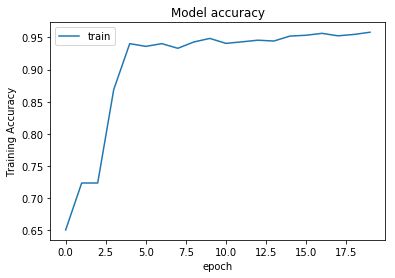

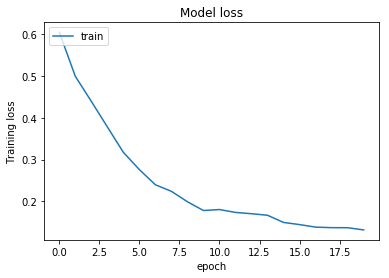

The accuracy is:  94.19795219808715


In [23]:
#now I am testing with the new model of grid.model.estimator.model
input_size = 4096
hidden_neurons = 100
out_size = 2

def model_creator():
    
    # -----------------------------------------
    # second layer: hidden layer:
    grid.best_estimator_.model.add(Dense(hidden_neurons, input_dim = input_size))  # Nuerons
    grid.best_estimator_.model.add(Activation('sigmoid')) # Activation

    # -----------------------------------------
    # third layer: output layer:
    grid.best_estimator_.model.add(Dense(out_size, input_dim = hidden_neurons))  # Nuerons
    grid.best_estimator_.model.add(Activation('softmax')) # Activation

    
    # compile:
    grid.best_estimator_.model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

    #training
    fitted_model = grid.best_estimator_.model.fit(X_train, y_train, batch_size=100, epochs=20, verbose=1)
    
    y_predict = grid.best_estimator_.model.predict(X_test, verbose=1)
    
    score = grid.best_estimator_.model.evaluate(X_test, y_test, verbose=1)
    
    
    
    plt.plot(fitted_model.history['acc'])
    #plt.plot(fitted_model.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Training Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(fitted_model.history['loss'])
    #plt.plot(fitted_model.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Training loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    return print('The accuracy is: ', score[1]*100)

model_creator()

# ANN NUERAL NETWORK MODEL

In [24]:
# Declare Sequential model to build our network:
ann_model = Sequential()

input_size = 4096
hidden_neurons = 100
out_size = 2


## Designing the NN Structure:

# -----------------------------------------
# first layer: input layer
# Input layer does not do any processing, so no need to define the input layer in this problem.

# -----------------------------------------
# second layer: hidden layer:
ann_model.add(Dense(hidden_neurons, input_dim = input_size))  # Nuerons
ann_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# third layer: output layer:
ann_model.add(Dense(out_size, input_dim = hidden_neurons))  # Nuerons
ann_model.add(Activation('softmax')) # Activation


In [25]:
ann_model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

In [26]:
ann_fitted_model = ann_model.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=15, verbose=1)

Train on 3138 samples, validate on 1546 samples
Epoch 1/15
3138/3138 [==============================] - 6s 2ms/step - loss: 0.4013 - acc: 0.8276 - val_loss: 0.2541 - val_acc: 0.8946
Epoch 2/15
3138/3138 [==============================] - 1s 288us/step - loss: 0.2413 - acc: 0.9012 - val_loss: 0.1966 - val_acc: 0.9204
Epoch 3/15
3138/3138 [==============================] - 1s 295us/step - loss: 0.2226 - acc: 0.9108 - val_loss: 0.1939 - val_acc: 0.9217
Epoch 4/15
3138/3138 [==============================] - 1s 292us/step - loss: 0.1988 - acc: 0.9200 - val_loss: 0.1970 - val_acc: 0.9224
Epoch 5/15
3138/3138 [==============================] - 1s 285us/step - loss: 0.1886 - acc: 0.9273 - val_loss: 0.1698 - val_acc: 0.9282
Epoch 6/15
3138/3138 [==============================] - 1s 285us/step - loss: 0.1865 - acc: 0.9216 - val_loss: 0.1826 - val_acc: 0.9301
Epoch 7/15
3138/3138 [==============================] - 1s 293us/step - loss: 0.1892 - acc: 0.9273 - val_loss: 0.1818 - val_acc: 0.9250
Ep

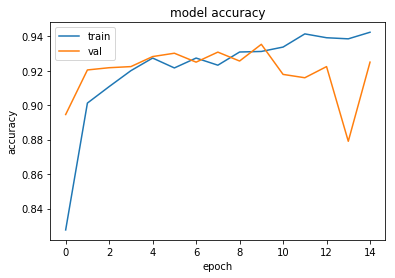

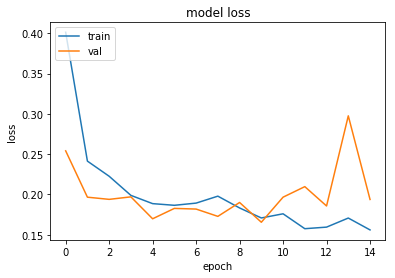

In [27]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(ann_fitted_model.history['acc'])
plt.plot(ann_fitted_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(ann_fitted_model.history['loss'])
plt.plot(ann_fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# print(fitted_model.history)

In [28]:
# Prediction:
y_predict = ann_model.predict(X_test, verbose=1)
print (y_predict.shape)

1172/1172 [==============================] - 1s 1ms/step
(1172, 2)


In [29]:
# Evaluation:
ann_score = ann_model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', ann_score[1])

1172/1172 [==============================] - 0s 122us/step
The accuracy is:  0.9189419793187554


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


print(X_train[0].shape)

(64, 64)


# Data pre-processing FOR CNN
Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images. Then comes the shape of each image (64x64). The last number is 1, which signifies that the images are greyscale.

In [64]:
#reshape data to fit model
X_train = X_train.reshape(X_train.shape[0],64,64,1)
X_test = X_test.reshape(X_test.shape[0],64,64,1)

In [65]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

#print(X_test)
print('\n')
print(y_test)

(4684, 64, 64, 1)
(4684,)
(1172, 64, 64, 1)
(1172,)


[0 0 1 ... 1 1 1]


# We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. 

In [66]:
from keras.utils import to_categorical

# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [67]:
print(y_train[:10])
print(y_train.shape)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
(4684, 2)


# Building the model
Now we are ready to build our model. Here is the code:

In [24]:
#create model
cnn_model = Sequential()
#add model layers
cnn_model.add(Dense(16, activation='relu', input_shape=(64,64,1)))
cnn_model.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn_model.add(Conv2D(64, kernel_size=3, activation='relu'))

cnn_model.add(Flatten())
cnn_model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
#compile model using accuracy to measure model performance
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 64, 64, 16)        32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_190 (Dense)            (None, 2)                 460802    
Total params: 483,970
Trainable params: 483,970
Non-trainable params: 0
_________________________________________________________________


# Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (train_X), target data (train_y), validation data, and the number of epochs.

For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.

In [40]:
#train the model
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 4684 samples, validate on 1172 samples
Epoch 1/3
4684/4684 [==============================] - 76s 16ms/step - loss: 0.3232 - acc: 0.8555 - val_loss: 0.1886 - val_acc: 0.9266
Epoch 2/3
4684/4684 [==============================] - 70s 15ms/step - loss: 0.1663 - acc: 0.9330 - val_loss: 0.1609 - val_acc: 0.9360
Epoch 3/3
4684/4684 [==============================] - 71s 15ms/step - loss: 0.1346 - acc: 0.9477 - val_loss: 0.1438 - val_acc: 0.9514


In [42]:
#predict first 4 images in the test set
print(cnn_model.predict(X_test[:10]))

#actual results for first 4 images in test set
y_test[:10]

[[9.9724150e-01 2.7585104e-03]
 [2.0601600e-01 7.9398406e-01]
 [1.3364773e-03 9.9866354e-01]
 [9.9978238e-01 2.1766455e-04]
 [9.9996281e-01 3.7139922e-05]
 [4.6626020e-02 9.5337397e-01]
 [4.2838287e-03 9.9571615e-01]
 [3.8251005e-02 9.6174896e-01]
 [2.3274082e-03 9.9767262e-01]
 [2.3072524e-01 7.6927477e-01]]


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# TESTING

In [43]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1172/1172 [==============================] - 4s 4ms/step
Test loss: 0.14378454180199132
Test accuracy: 0.9513651877133106


# NEW CNN MODEL

In [98]:
#create model
cnn2_model = Sequential()


#We add dense layers at the end which are used for class prediction(0–9).

cnn2_model.add(Dense(64, activation='relu', input_shape=(64,64,1)))
cnn2_model.add(Dense(32, activation='relu'))

cnn2_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))



cnn2_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn2_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn2_model.add(Dropout(0.25))

cnn2_model.add(Dense(128, activation='relu'))


#dropout randomly switches off some neurons in the network which forces the data to find new paths. 
#Therefore, this reduces overfitting. 
cnn2_model.add(Dropout(0.5))



#he flatten layer expands a three-dimensional vector into a one-dimensional vector. 
cnn2_model.add(Flatten())


#We add dense layers at the end which are used for class prediction(0(normal)–1(pneumonia)).
cnn2_model.add(Dense(2, activation='softmax'))

In [99]:
#compile model using accuracy to measure model performance
cnn2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_403 (Dense)            (None, 64, 64, 64)        128       
_________________________________________________________________
dense_404 (Dense)            (None, 64, 64, 32)        2080      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
dense_405 (Dense)            (None, 30, 30, 128)       8320      
__________

In [100]:
#train the model
cnn2_fittedmodel = cnn2_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=30, epochs=10)

Train on 4684 samples, validate on 1172 samples
Epoch 1/10
4684/4684 [==============================] - 139s 30ms/step - loss: 0.3267 - acc: 0.8542 - val_loss: 0.1897 - val_acc: 0.9266
Epoch 2/10
4684/4684 [==============================] - 123s 26ms/step - loss: 0.1788 - acc: 0.9313 - val_loss: 0.1726 - val_acc: 0.9411
Epoch 3/10
4684/4684 [==============================] - 122s 26ms/step - loss: 0.1572 - acc: 0.9424 - val_loss: 0.1545 - val_acc: 0.9428
Epoch 4/10
4684/4684 [==============================] - 123s 26ms/step - loss: 0.1462 - acc: 0.9466 - val_loss: 0.1379 - val_acc: 0.9531
Epoch 5/10
4684/4684 [==============================] - 122s 26ms/step - loss: 0.1338 - acc: 0.9530 - val_loss: 0.1415 - val_acc: 0.9505
Epoch 6/10
4684/4684 [==============================] - 122s 26ms/step - loss: 0.1231 - acc: 0.9535 - val_loss: 0.1452 - val_acc: 0.9522
Epoch 7/10
4684/4684 [==============================] - 123s 26ms/step - loss: 0.1094 - acc: 0.9603 - val_loss: 0.1265 - val_acc: 

In [101]:
#predict first 4 images in the test set
print(cnn2_model.predict(X_test[:4]))

#actual results for first 4 images in test set
y_test[:4]

[[9.9998045e-01 1.9514007e-05]
 [9.6370602e-01 3.6293950e-02]
 [2.4771728e-04 9.9975222e-01]
 [9.9999297e-01 7.0243468e-06]]


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [102]:
cnn2_score = cnn2_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn2_score[0])
print('Test accuracy:', cnn2_score[1])

1172/1172 [==============================] - 12s 10ms/step
Test loss: 0.21749178688884188
Test accuracy: 0.9266211600026987


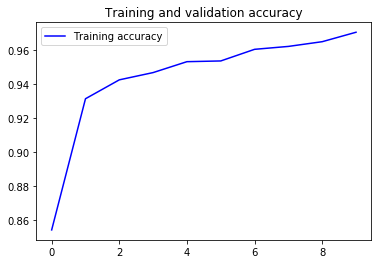

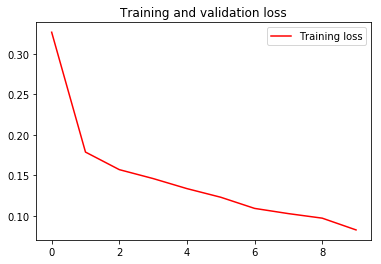

In [103]:
accuracy = cnn2_fittedmodel.history['acc']
#val_accuracy = history.history['val_acc']
loss = cnn2_fittedmodel.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# THE CNN I USED AND GOT THE BEST RESULT OF 95.4%.

In [75]:
def cnn_model():
    cnn_model = Sequential()

    cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    #dropout randomly switches off some neurons in the network which forces the data to find new paths. 
    #Therefore, this reduces overfitting. 
    cnn_model.add(Dropout(0.25))

    #he flatten layer expands a three-dimensional vector into a one-dimensional vector. 
    cnn_model.add(Flatten())
    cnn_model.add(Dense(16, activation='relu'))

    #We add dense layers at the end which are used for class prediction(0(normal)–1(pneumonia)).
    cnn_model.add(Dense(2, activation='softmax'))
    
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn_model

cnn_model()

In [76]:
seed=2
np.random.seed(seed)

In [77]:
cnnmodel = KerasClassifier(build_fn=cnn_model, verbose=2)

In [78]:
#DEFINED THE VALUES THAT SHOULD BE SEARCHED
batchsize = [20 , 40 , 60 ] 
epochs = [5 , 10 , 15]

#CREATING A PARAM_GRID: MAPPING THE param names to the values that should be searched
cnn_param_grid = {'batch_size':batchsize, 'epochs':epochs} 
cnn_grid = GridSearchCV(cnnmodel, cnn_param_grid, cv=10)

In [80]:
cnn_fitted_model = cnn_grid.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1)

Train on 4215 samples, validate on 1172 samples
Epoch 1/5
4215/4215 [==============================] - 29s 7ms/step - loss: 0.3511 - acc: 0.8472 - val_loss: 0.2258 - val_acc: 0.9121
Epoch 2/5
4215/4215 [==============================] - 30s 7ms/step - loss: 0.2080 - acc: 0.9196 - val_loss: 0.2063 - val_acc: 0.9215
Epoch 3/5
4215/4215 [==============================] - 30s 7ms/step - loss: 0.1686 - acc: 0.9378 - val_loss: 0.2049 - val_acc: 0.9292
Epoch 4/5
4215/4215 [==============================] - 29s 7ms/step - loss: 0.1528 - acc: 0.9405 - val_loss: 0.2120 - val_acc: 0.9241
Epoch 5/5
4215/4215 [==============================] - 29s 7ms/step - loss: 0.1446 - acc: 0.9452 - val_loss: 0.1441 - val_acc: 0.9497
Train on 4215 samples, validate on 1172 samples
Epoch 1/5
4215/4215 [==============================] - 30s 7ms/step - loss: 0.4194 - acc: 0.8005 - val_loss: 0.3339 - val_acc: 0.8933
Epoch 2/5
4215/4215 [==============================] - 30s 7ms/step - loss: 0.2867 - acc: 0.9132 - v

4216/4216 [==============================] - 31s 7ms/step - loss: 0.1728 - acc: 0.9488 - val_loss: 0.1756 - val_acc: 0.9437
Epoch 7/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.1611 - acc: 0.9481 - val_loss: 0.2174 - val_acc: 0.9232
Epoch 8/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.1611 - acc: 0.9457 - val_loss: 0.1513 - val_acc: 0.9539
Epoch 9/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.1460 - acc: 0.9549 - val_loss: 0.1491 - val_acc: 0.9480
Epoch 10/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.1312 - acc: 0.9575 - val_loss: 0.1493 - val_acc: 0.9548
Train on 4216 samples, validate on 1172 samples
Epoch 1/10
4216/4216 [==============================] - 35s 8ms/step - loss: 0.4292 - acc: 0.8000 - val_loss: 0.3249 - val_acc: 0.9087
Epoch 2/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.2825 - acc: 0.9163 - val_loss: 0.2475 - val_acc: 0.9266
Epoch 3/10
4216/4

Epoch 10/15
4215/4215 [==============================] - 30s 7ms/step - loss: 0.1077 - acc: 0.9604 - val_loss: 0.1337 - val_acc: 0.9548
Epoch 11/15
4215/4215 [==============================] - 31s 7ms/step - loss: 0.1091 - acc: 0.9618 - val_loss: 0.1285 - val_acc: 0.9582
Epoch 12/15
4215/4215 [==============================] - 30s 7ms/step - loss: 0.1035 - acc: 0.9651 - val_loss: 0.1337 - val_acc: 0.9497
Epoch 13/15
4215/4215 [==============================] - 31s 7ms/step - loss: 0.0938 - acc: 0.9620 - val_loss: 0.1480 - val_acc: 0.9488
Epoch 14/15
4215/4215 [==============================] - 30s 7ms/step - loss: 0.0944 - acc: 0.9649 - val_loss: 0.1467 - val_acc: 0.9556
Epoch 15/15
4215/4215 [==============================] - 30s 7ms/step - loss: 0.0926 - acc: 0.9680 - val_loss: 0.1490 - val_acc: 0.9531
Train on 4215 samples, validate on 1172 samples
Epoch 1/15
4215/4215 [==============================] - 33s 8ms/step - loss: 0.3317 - acc: 0.8515 - val_loss: 0.2077 - val_acc: 0.9172
E

4216/4216 [==============================] - 30s 7ms/step - loss: 0.1145 - acc: 0.9573 - val_loss: 0.1325 - val_acc: 0.9522
Epoch 9/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.1208 - acc: 0.9535 - val_loss: 0.1243 - val_acc: 0.9590
Epoch 10/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.1112 - acc: 0.9611 - val_loss: 0.1275 - val_acc: 0.9573
Epoch 11/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.1074 - acc: 0.9585 - val_loss: 0.1461 - val_acc: 0.9497
Epoch 12/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.0974 - acc: 0.9632 - val_loss: 0.1359 - val_acc: 0.9616
Epoch 13/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.0924 - acc: 0.9644 - val_loss: 0.1405 - val_acc: 0.9505
Epoch 14/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.0922 - acc: 0.9644 - val_loss: 0.1326 - val_acc: 0.9548
Epoch 15/15
4216/4216 [==============================] - 31s 

4216/4216 [==============================] - 31s 7ms/step - loss: 0.1841 - acc: 0.9492 - val_loss: 0.1775 - val_acc: 0.9480
Epoch 9/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.1807 - acc: 0.9452 - val_loss: 0.1814 - val_acc: 0.9471
Epoch 10/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.1676 - acc: 0.9488 - val_loss: 0.1695 - val_acc: 0.9488
Train on 4216 samples, validate on 1172 samples
Epoch 1/10
4216/4216 [==============================] - 35s 8ms/step - loss: 0.4697 - acc: 0.7472 - val_loss: 0.3093 - val_acc: 0.9155
Epoch 2/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.2930 - acc: 0.9103 - val_loss: 0.2504 - val_acc: 0.9386
Epoch 3/10
4216/4216 [==============================] - 31s 7ms/step - loss: 0.2584 - acc: 0.9307 - val_loss: 0.2353 - val_acc: 0.9334
Epoch 4/10
4216/4216 [==============================] - 32s 8ms/step - loss: 0.2357 - acc: 0.9379 - val_loss: 0.2508 - val_acc: 0.9206
Epoch 5/10
4216/4

4216/4216 [==============================] - 30s 7ms/step - loss: 0.1301 - acc: 0.9611 - val_loss: 0.1548 - val_acc: 0.9480
Train on 4216 samples, validate on 1172 samples
Epoch 1/15
4216/4216 [==============================] - 34s 8ms/step - loss: 0.4333 - acc: 0.8079 - val_loss: 0.2539 - val_acc: 0.9053
Epoch 2/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.2141 - acc: 0.9146 - val_loss: 0.1748 - val_acc: 0.9377
Epoch 3/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.1802 - acc: 0.9303 - val_loss: 0.2225 - val_acc: 0.9249
Epoch 4/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.1628 - acc: 0.9402 - val_loss: 0.1532 - val_acc: 0.9480
Epoch 5/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.1483 - acc: 0.9426 - val_loss: 0.1457 - val_acc: 0.9471
Epoch 6/15
4216/4216 [==============================] - 30s 7ms/step - loss: 0.1423 - acc: 0.9488 - val_loss: 0.1684 - val_acc: 0.9334
Epoch 7/15
4216/42

4216/4216 [==============================] - 38s 9ms/step - loss: 0.4723 - acc: 0.7533 - val_loss: 0.3095 - val_acc: 0.9130
Epoch 2/5
4216/4216 [==============================] - 32s 8ms/step - loss: 0.3041 - acc: 0.9039 - val_loss: 0.2626 - val_acc: 0.9300
Epoch 3/5
4216/4216 [==============================] - 32s 8ms/step - loss: 0.2773 - acc: 0.9201 - val_loss: 0.2665 - val_acc: 0.9292
Epoch 4/5
4216/4216 [==============================] - 32s 8ms/step - loss: 0.2489 - acc: 0.9326 - val_loss: 0.2322 - val_acc: 0.9386
Epoch 5/5
4216/4216 [==============================] - 32s 8ms/step - loss: 0.2305 - acc: 0.9419 - val_loss: 0.2078 - val_acc: 0.9480
Train on 4216 samples, validate on 1172 samples
Epoch 1/5
4216/4216 [==============================] - 38s 9ms/step - loss: 0.4636 - acc: 0.7569 - val_loss: 0.3229 - val_acc: 0.9019
Epoch 2/5
4216/4216 [==============================] - 32s 8ms/step - loss: 0.3043 - acc: 0.9023 - val_loss: 0.2699 - val_acc: 0.9172
Epoch 3/5
4216/4216 [===

4215/4215 [==============================] - 33s 8ms/step - loss: 0.1429 - acc: 0.9447 - val_loss: 0.1410 - val_acc: 0.9488
Epoch 8/15
4215/4215 [==============================] - 33s 8ms/step - loss: 0.1256 - acc: 0.9485 - val_loss: 0.1314 - val_acc: 0.9505
Epoch 9/15
4215/4215 [==============================] - 33s 8ms/step - loss: 0.1179 - acc: 0.9537 - val_loss: 0.1395 - val_acc: 0.9471
Epoch 10/15
4215/4215 [==============================] - 33s 8ms/step - loss: 0.1164 - acc: 0.9540 - val_loss: 0.1201 - val_acc: 0.9608
Epoch 11/15
4215/4215 [==============================] - 33s 8ms/step - loss: 0.1084 - acc: 0.9582 - val_loss: 0.1393 - val_acc: 0.9471
Epoch 12/15
4215/4215 [==============================] - 32s 8ms/step - loss: 0.1144 - acc: 0.9573 - val_loss: 0.1311 - val_acc: 0.9556
Epoch 13/15
4215/4215 [==============================] - 33s 8ms/step - loss: 0.1013 - acc: 0.9606 - val_loss: 0.1198 - val_acc: 0.9616
Epoch 14/15
4215/4215 [==============================] - 34s 8

4216/4216 [==============================] - 34s 8ms/step - loss: 0.2488 - acc: 0.9338 - val_loss: 0.2475 - val_acc: 0.9283
Epoch 6/15
4216/4216 [==============================] - 33s 8ms/step - loss: 0.2340 - acc: 0.9393 - val_loss: 0.2257 - val_acc: 0.9360
Epoch 7/15
4216/4216 [==============================] - 34s 8ms/step - loss: 0.2161 - acc: 0.9398 - val_loss: 0.2068 - val_acc: 0.9437
Epoch 8/15
4216/4216 [==============================] - 33s 8ms/step - loss: 0.2075 - acc: 0.9417 - val_loss: 0.2024 - val_acc: 0.9437
Epoch 9/15
4216/4216 [==============================] - 33s 8ms/step - loss: 0.1916 - acc: 0.9481 - val_loss: 0.1876 - val_acc: 0.9497
Epoch 10/15
4216/4216 [==============================] - 33s 8ms/step - loss: 0.1872 - acc: 0.9462 - val_loss: 0.1772 - val_acc: 0.9565
Epoch 11/15
4216/4216 [==============================] - 33s 8ms/step - loss: 0.1780 - acc: 0.9497 - val_loss: 0.1745 - val_acc: 0.9488
Epoch 12/15
4216/4216 [==============================] - 32s 8ms

In [81]:
print("The best batch_size and epochs", cnn_fitted_model.best_params_)

The best batch_size and epochs {'batch_size': 40, 'epochs': 15}


In [85]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
#dropout randomly switches off some neurons in the network which forces the data to find new paths. 
#Therefore, this reduces overfitting. 
cnn_model.add(Dropout(0.25))

#he flatten layer expands a three-dimensional vector into a one-dimensional vector. 
cnn_model.add(Flatten())
cnn_model.add(Dense(16, activation='relu'))

#We add dense layers at the end which are used for class prediction(0(normal)–1(pneumonia)).
cnn_model.add(Dense(2, activation='softmax'))

In [86]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
cnn_model_fittedmodel = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=40, epochs=15)

Train on 4684 samples, validate on 1172 samples
Epoch 1/15
4684/4684 [==============================] - 42s 9ms/step - loss: 0.4228 - acc: 0.8044 - val_loss: 0.2520 - val_acc: 0.9002
Epoch 2/15
4684/4684 [==============================] - 34s 7ms/step - loss: 0.2134 - acc: 0.9165 - val_loss: 0.1886 - val_acc: 0.9258
Epoch 3/15
4684/4684 [==============================] - 34s 7ms/step - loss: 0.1776 - acc: 0.9310 - val_loss: 0.1747 - val_acc: 0.9369
Epoch 4/15
4684/4684 [==============================] - 34s 7ms/step - loss: 0.1552 - acc: 0.9409 - val_loss: 0.1680 - val_acc: 0.9437
Epoch 5/15
4684/4684 [==============================] - 34s 7ms/step - loss: 0.1455 - acc: 0.9471 - val_loss: 0.1552 - val_acc: 0.9437
Epoch 6/15
4684/4684 [==============================] - 34s 7ms/step - loss: 0.1449 - acc: 0.9436 - val_loss: 0.1394 - val_acc: 0.9522
Epoch 7/15
4684/4684 [==============================] - 35s 7ms/step - loss: 0.1300 - acc: 0.9500 - val_loss: 0.1382 - val_acc: 0.9539
Epoch 8

In [88]:
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_score[0])
print('Test accuracy:', cnn_score[1])

1172/1172 [==============================] - 2s 2ms/step
Test loss: 0.12221729170543749
Test accuracy: 0.9547781567931583


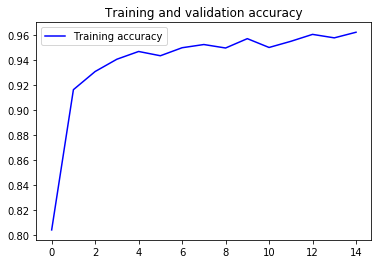

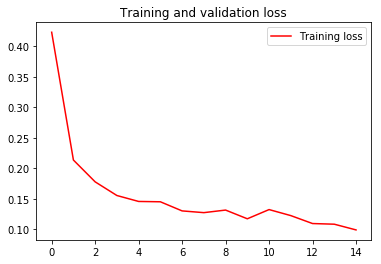

In [89]:
accuracy = cnn_model_fittedmodel.history['acc']
#val_accuracy = history.history['val_acc']
loss = cnn_model_fittedmodel.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()